In [35]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import seaborn as sns

  

In [36]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [37]:
# Twitter API Keys
consumer_key = "shWr7pEe916vmISty4bcWsEl6"
consumer_secret = "OIi6BpZ3MpToJTVQojfSDsDpqrN1Cpaw3uhCkLrxSRi1xQpm0j"
access_token = "937017372132630528-zSy6v3P65mytop6ubS9ZMEVO2peimhw"
access_token_secret = "Hys8Hx2uV62lwRLKdMU3zr0WbWiWePX6IvWVZYZenhEN7"


In [38]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [39]:
#news organisations list
news_org = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
post_sentiment =[]

In [40]:
# going through 100  tweets of each oranization and sentiment analysis
for news in news_org:
    counter = 1
    for item in tweepy.Cursor(api.user_timeline, id=news).items(100):
        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        news_dict = {
            'source':news,
            'date': tweet["created_at"],
            'text':text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'tweets ago': counter 
        }
        post_sentiment.append(news_dict)
        counter +=1
    

In [41]:
# data frame from results
df = pd.DataFrame.from_dict(post_sentiment)
df

,compound,date,negative,positive,source,text,tweets ago
0,0.0000,Wed Dec 13 20:00:10 +0000 2017,0.000,0.000,@BBC,London's Euston station will be turned into a ...,1
1,0.3384,Wed Dec 13 19:31:04 +0000 2017,0.000,0.146,@BBC,🐘 Why you must never pee in front of elephants...,2
2,0.2263,Wed Dec 13 19:00:02 +0000 2017,0.000,0.083,@BBC,"It’s spicy, it's tangy &amp; it'll warm you ri...",3
3,-0.4215,Wed Dec 13 18:32:04 +0000 2017,0.189,0.000,@BBC,Princess Margaret broke all the royal rules lo...,4
4,0.1280,Wed Dec 13 18:00:12 +0000 2017,0.000,0.081,@BBC,"Còsagach: A feeling of being snug, sheltered o...",5
5,0.0000,Wed Dec 13 17:30:01 +0000 2017,0.000,0.000,@BBC,"Dwayne Johnson, president, 2020?\n\nThe Graham...",6
6,0.8658,Wed Dec 13 17:23:02 +0000 2017,0.000,0.350,@BBC,"RT @bbcgenome: #OTD 2006, @StephenMerchant won...",7
7,0.0000,Wed Dec 13 17:00:14 +0000 2017,0.000,0.000,@BBC,"'Tartes of flesh' used to include pork, hard-b...",8
8,0.2023,Wed Dec 13 15:49:03 +0000 2017,0.000,0.130,@BBC,'Meghan Markle' and 'fidget spinners' top UK G...,9
9,0.6249,Wed Dec 13 15:39:29 +0000 2017,0.000,0.181,@BBC,RT @BBCNewsEnts: Peter Kay fans will be please...,10


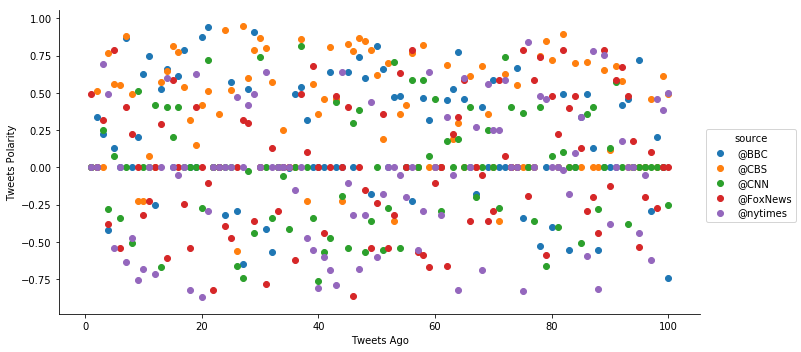

In [42]:
#Scatter plot from each tweets from each organization 
fg = sns.FacetGrid(data=df, hue='source', aspect=2, size=5)
fg.map(plt.scatter, 'tweets ago', 'compound').add_legend()
plt.xlabel ('Tweets Ago')
plt.ylabel ('Tweets Polarity')
plt.show()


In [44]:
# aggregate the compound sentiments analyzed by VADER.
df_groupby = df.groupby('source').mean()
df_groupby.reset_index(inplace=True)
df_groupby

,source,compound,negative,positive,tweets ago
0,@BBC,0.169291,0.03104,0.09867,50.5
1,@CBS,0.367527,0.00979,0.15873,50.5
2,@CNN,-0.009137,0.06276,0.06071,50.5
3,@FoxNews,0.010751,0.08606,0.08006,50.5
4,@nytimes,-0.047742,0.09003,0.07124,50.5


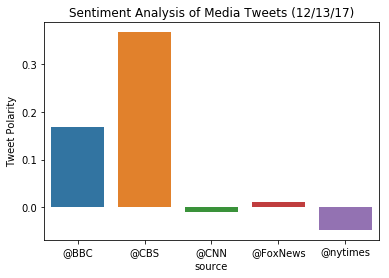

In [48]:
# Barplot of aggregate the compound sentiments analyzed by VADER.
sns.barplot(data=df_groupby, x='source', y='compound')
plt.title('Sentiment Analysis of Media Tweets (12/13/17)')
plt.ylabel('Tweet Polarity')
plt.show()

In [ ]:
# Trend 1 'CBS' has the most positive score based on 12/13/17 tweets
# Trend 2 'nytimes' has the most negative score based on 12/13/17 tweets
# Trend 3 news org. has the comparitively more closet o neutal on 12/13/17 tweets